In [1]:
using Distributions
using RCall
@rimport stats as stats
using StatsPlots
default(fmt=:png, size=(400, 250))

In [2]:
function logtick(; xlim=(0.03, 500))
    xmin, xmax = xlim
    a = floor(Int, log10(xmin))
    b = ceil(Int, log10(xmax))
    nums =     [1, 2, 3, 4, 5, 6, 7, 8, 9]
    mask = Bool[1, 1, 0, 0, 1, 0, 0, 0, 0]
    
    logtick = foldl(vcat, ([10.0^k*x for x in nums if xmin ≤ 10.0^k*x ≤ xmax] for k in a:b))
    logticklabel_a = foldl(vcat,
        ([mask[i] ? string(round(10.0^k*x; digits=-k)) : ""
                for (i, x) in enumerate(nums) if xmin ≤ 10.0^k*x ≤ xmax]
            for k in a:-1))
    logticklabel_b = foldl(vcat,
        ([mask[i] ? string(10^k*x) : ""
                for (i, x) in enumerate(nums) if xmin ≤ 10.0^k*x ≤ xmax]
            for k in 0:b))
    logticklabel = vcat(logticklabel_a, logticklabel_b)
    (logtick, logticklabel)
end

logtick()

([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.30000000000000004  …  50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 200.0, 300.0, 400.0, 500.0], ["", "", "0.05", "", "", "", "", "0.1", "0.2", ""  …  "50", "", "", "", "", "100", "200", "", "", "500"])

In [3]:
function is_symmetric_Hypergeometric(s, f, n)
    fnchg = FisherNoncentralHypergeometric(s, f, n, 1.0)
    xmin, xmax = extrema(fnchg)
    for i in 0:(xmax-xmin)÷2
        pdf(fnchg, xmin+i) != pdf(fnchg, xmax-i) && return false
    end
    true
end

is_symmetric_Hypergeometric (generic function with 1 method)

In [4]:
mn = [(m, n) for m in 1:20 for n in 1:2m-1 if !is_symmetric_Hypergeometric(m, m, n)]
@show length(mn)
@show mn;

length(mn) = 246
mn = [(6, 6), (7, 3), (7, 6), (7, 7), (7, 8), (7, 12), (8, 5), (8, 7), (8, 8), (8, 9), (9, 6), (9, 7), (9, 8), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (10, 2), (10, 4), (10, 5), (10, 8), (10, 9), (10, 12), (10, 13), (10, 15), (10, 18), (11, 5), (11, 6), (11, 7), (11, 8), (11, 10), (11, 11), (11, 12), (11, 14), (11, 16), (11, 17), (11, 18), (11, 19), (11, 20), (12, 2), (12, 4), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11), (12, 12), (12, 14), (12, 15), (12, 16), (12, 17), (12, 18), (12, 22), (13, 3), (13, 4), (13, 6), (13, 7), (13, 8), (13, 9), (13, 10), (13, 12), (13, 13), (13, 14), (13, 16), (13, 17), (13, 18), (13, 19), (13, 20), (13, 22), (13, 23), (14, 4), (14, 6), (14, 7), (14, 8), (14, 9), (14, 10), (14, 11), (14, 13), (14, 14), (14, 15), (14, 17), (14, 18), (14, 19), (14, 20), (14, 21), (14, 22), (14, 23), (14, 24), (14, 26), (15, 3), (15, 5), (15, 6), (15, 7), (15, 8), (15, 9), (15, 10), (15, 11), (15, 12), (15, 13), (15, 14), (15, 15), 

In [5]:
@show m, n = mn[20]
fnchg = FisherNoncentralHypergeometric(m, m, n, 1.0)
[(k, pdf(fnchg, k)) for k in support(fnchg)]

(m, n) = mn[20] = (10, 4)


5-element Vector{Tuple{Int64, Float64}}:
 (0, 0.043343653250773995)
 (1, 0.2476780185758514)
 (2, 0.4179566563467493)
 (3, 0.2476780185758514)
 (4, 0.04334365325077399)

In [6]:
function pvalue_less_equal__J(a, b, c, d; OR = 1.0)
    fnchg = FisherNoncentralHypergeometric(a+b, c+d, a+c, OR)
    sum(pdf(fnchg, x) for x in support(fnchg) if pdf(fnchg, x) ≤ pdf(fnchg, a))
end

x ⪅ y = x < y || x ≈ y

function pvalue_less_approx_J(a, b, c, d; OR = 1.0)
    fnchg = FisherNoncentralHypergeometric(a+b, c+d, a+c, OR)
    sum(pdf(fnchg, x) for x in support(fnchg) if pdf(fnchg, x) ⪅ pdf(fnchg, a))
end

function pvalue_fisher_test_R(a, b, c, d)
    rcopy(stats.fisher_test([a b; c d]))[:p_value]
end

pvalue_fisher_test_R (generic function with 1 method)

In [7]:
@show m, n = mn[20]
a = 4
b, c, d = m-a, n-a, m+a-n
@show a, b, c, d
@show pvalue_less_equal__J(a, b, c, d)
@show pvalue_less_approx_J(a, b, c, d)
@show pvalue_fisher_test_R(a, b, c, d);

(m, n) = mn[20] = (10, 4)
(a, b, c, d) = (4, 6, 0, 10)
pvalue_less_equal__J(a, b, c, d) = 0.04334365325077399
pvalue_less_approx_J(a, b, c, d) = 0.08668730650154799
pvalue_fisher_test_R(a, b, c, d) = 0.08668730650154799


In [8]:
@show m, n = mn[23]
fnchg = FisherNoncentralHypergeometric(m, m, n, 1.0)
[(k, pdf(fnchg, k)) for k in support(fnchg)]

(m, n) = mn[23] = (10, 9)


10-element Vector{Tuple{Int64, Float64}}:
 (0, 5.953798523457967e-5)
 (1, 0.002679209335556085)
 (2, 0.032150512026673024)
 (3, 0.15003572279114077)
 (4, 0.3150750178613955)
 (5, 0.3150750178613955)
 (6, 0.15003572279114072)
 (7, 0.03215051202667301)
 (8, 0.0026792093355560843)
 (9, 5.9537985234579646e-5)

In [9]:
@show m, n = mn[23]
a = 7
b, c, d = m-a, n-a, m+a-n
@show a, b, c, d
@show pvalue_less_equal__J(a, b, c, d)
@show pvalue_less_approx_J(a, b, c, d)
@show pvalue_fisher_test_R(a, b, c, d);

(m, n) = mn[23] = (10, 9)
(a, b, c, d) = (7, 3, 2, 8)
pvalue_less_equal__J(a, b, c, d) = 0.03762800666825434
pvalue_less_approx_J(a, b, c, d) = 0.06977851869492735
pvalue_fisher_test_R(a, b, c, d) = 0.06977851869492734


In [10]:
ORhat = (a/b)/(c/d)

9.333333333333334

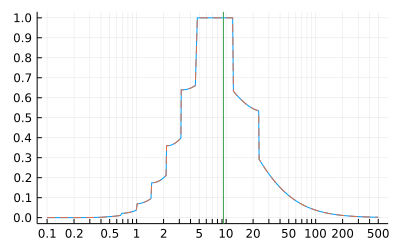

In [11]:
plot(x -> pvalue_less_equal__J(a, b, c, d; OR = x), 0.1, 500; label="")
plot!(x -> pvalue_less_approx_J(a, b, c, d; OR = x), 0.1, 500; label="", ls=:dash)
vline!([ORhat]; label="")
plot!(xscale=:log10, xtick=logtick(xlim=(0.1, 500)), ytick=0:0.1:1)

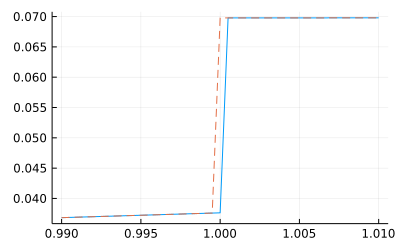

In [12]:
xs = 0.99:0.0005:1.01
plot(xs, x -> pvalue_less_equal__J(a, b, c, d; OR = x); label="")
plot!(xs, x -> pvalue_less_approx_J(a, b, c, d; OR = x); label="", ls=:dash)
plot!(ytick=0:0.005:1)

In [13]:
m, n = 20, 20
@show m, n
fnchg = FisherNoncentralHypergeometric(m, m, n, 1.0)
[(k, pdf(fnchg, k)) for k in support(fnchg)]

(m, n) = (20, 20)


21-element Vector{Tuple{Int64, Float64}}:
 (0, 7.254444551924844e-12)
 (1, 2.9017778207699377e-9)
 (2, 2.6188544832448686e-7)
 (3, 9.427876139681528e-6)
 (4, 0.0001702910127729976)
 (5, 0.0017437799707954954)
 (6, 0.010898624817471846)
 (7, 0.043594499269887385)
 (8, 0.11511672463454636)
 (9, 0.2046519549058602)
 (10, 0.24762886543609083)
 (11, 0.2046519549058602)
 (12, 0.11511672463454635)
 (13, 0.04359449926988738)
 (14, 0.010898624817471845)
 (15, 0.0017437799707954952)
 (16, 0.00017029101277299757)
 (17, 9.427876139681526e-6)
 (18, 2.618854483244868e-7)
 (19, 2.901777820769937e-9)
 (20, 7.254444551924842e-12)

In [14]:
m, n = 20, 20
@show m, n
a = 13
b, c, d = m-a, n-a, m+a-n
@show a, b, c, d
@show pvalue_less_equal__J(a, b, c, d)
@show pvalue_less_approx_J(a, b, c, d)
@show pvalue_fisher_test_R(a, b, c, d);

(m, n) = (20, 20)
(a, b, c, d) = (13, 7, 7, 13)
pvalue_less_equal__J(a, b, c, d) = 0.0692392762132086
pvalue_less_approx_J(a, b, c, d) = 0.11283377548309599
pvalue_fisher_test_R(a, b, c, d) = 0.11283377548309592


In [15]:
ORhat = (a/b)/(c/d)

3.448979591836735

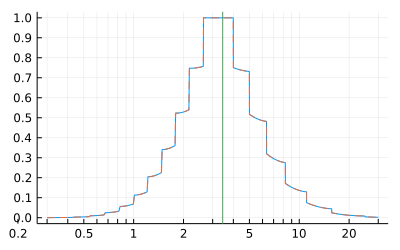

In [16]:
plot(x -> pvalue_less_equal__J(a, b, c, d; OR = x), 0.3, 30; label="")
plot!(x -> pvalue_less_approx_J(a, b, c, d; OR = x), 0.3, 30; label="", ls=:dash)
vline!([ORhat]; label="")
plot!(xscale=:log10, xtick=logtick(xlim=(0.1, 30)), ytick=0:0.1:1)

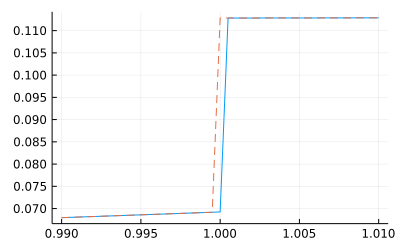

In [17]:
xs = 0.99:0.0005:1.01
plot(xs, x -> pvalue_less_equal__J(a, b, c, d; OR = x); label="")
plot!(xs, x -> pvalue_less_approx_J(a, b, c, d; OR = x); label="", ls=:dash)
plot!(ytick=0:0.005:1)